# Auto-completion of handwritten digits using Deep Learning

The file shows how to train and use a model to auto-complete an image of a number(0-9) only half-written. The halfway completed
image of a number is identified and correctly completed. THis can be then checked with the original unaltered image(full image) for correctness.

In [41]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam

seed = 5
np.random.seed(seed)
tf.random.set_random_seed(seed)

Import the train and test files containing the image values in csv format. Each row corresponds to an image with 784(28*28) pixel values and extra column called label. The dataset is taken from https://www.kaggle.com/oddrationale/mnist-in-csv

In [42]:
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')
print(test.shape)
train

(10000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The distribution of the numbers(0-9) in the train dataset

In [43]:
train.label.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

The column with the labels is not needed for this usecase and hence dropped.

In [44]:
train.drop(columns=['label'],inplace=True)
test.drop(columns=['label'],inplace=True)
print(train.shape)
print(test.shape)

(60000, 784)
(10000, 784)


Normalize the images

In [45]:
scaler = MinMaxScaler().fit(train.values)
train = scaler.transform(train.values)
test = scaler.transform(test.values)
print(train.shape)
print(test.shape)

(60000, 784)
(10000, 784)


An example of an image of a number.

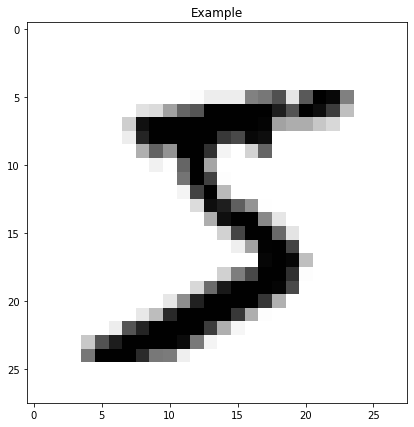

In [46]:
image = np.array(train[0]).reshape(28,28)
plt.figure(figsize=(13,7))
plt.imshow(image, cmap="gray_r")
plt.title('Example')
plt.show()

To create half-written images of numbers, we manually remove second half of the image by making the corresponding pixel values 0

In [47]:
n_exclude = train.shape[1] - int(train.shape[1]*0.5)
target = train.copy()
target_test = test.copy()
train[:,-(n_exclude):] = 0
test[:,-(n_exclude):] = 0

The same image above is now only half-written. It looks like the following. These images will serve as train inputs and the un-altered images as the targets.

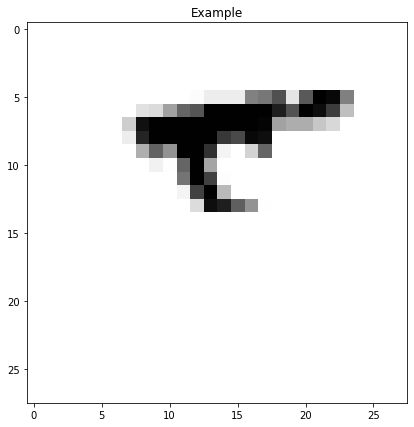

In [48]:
image = np.array(train[0]).reshape(28,28)
plt.figure(figsize=(13,7))
plt.imshow(image, cmap="gray_r")
plt.title('Example half-written')
plt.show()

Train a model with half-written images as inputs and un-altered original images as targets. Here we use Keras to train a deep neural network. The network learns to auto-complete the images according to the number (0-9)

In [49]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
model = Sequential()
model.add(Dense(1000, input_dim=train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(train.shape[1], activation='linear'))
early_stopping = EarlyStopping(monitor='val_loss',mode='min',patience=3)
opt = Adam(learning_rate=0.001)

model.compile(loss='mse', optimizer=opt)
history = model.fit(train, target, epochs=50, batch_size=128,  verbose=1, validation_split=0.3)
model.evaluate(test,target_test)

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 9s 218us/step - loss: 0.0346 - val_loss: 0.0237
Epoch 2/50
42000/42000 [==============================] - 9s 216us/step - loss: 0.0255 - val_loss: 0.0221
Epoch 3/50
42000/42000 [==============================] - 9s 220us/step - loss: 0.0242 - val_loss: 0.0213
Epoch 4/50
42000/42000 [==============================] - 9s 215us/step - loss: 0.0235 - val_loss: 0.0209
Epoch 5/50
42000/42000 [==============================] - 9s 218us/step - loss: 0.0231 - val_loss: 0.0208
Epoch 6/50
42000/42000 [==============================] - 9s 218us/step - loss: 0.0228 - val_loss: 0.0208
Epoch 7/50
42000/42000 [==============================] - 9s 219us/step - loss: 0.0226 - val_loss: 0.0204
Epoch 8/50
42000/42000 [==============================] - 9s 221us/step - loss: 0.0224 - val_loss: 0.0201
Epoch 9/50
42000/42000 [==============================] - 9s 226us/step - loss: 0.0222 - val_loss: 0.0

0.01905330699980259

The learning curve. The network architecture as well as other hyperparameters like dropout value, learning rate can further be altered to get a even better performance. But this is just to showcase the possibilities and hence working with a simple model.

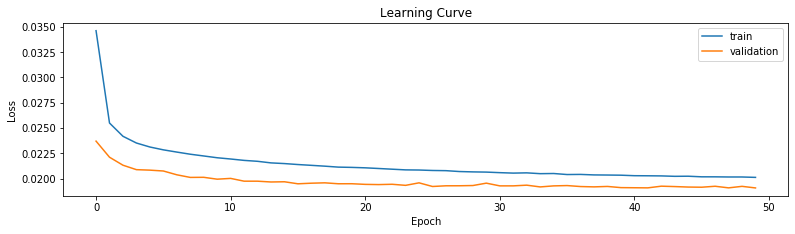

In [68]:
fig = plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Learning Curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Below we try to predict randomly some inputs from the test dataset which is also half-written. Then the result is compared with the corresponding original un-altered image for checking the effectiveness of the model. The images plotted here show the auto-completed iimages from NN along with the corresponding half-written input as well as the original un-altered images. The auto-completed images are correct and the goal has been achieved.

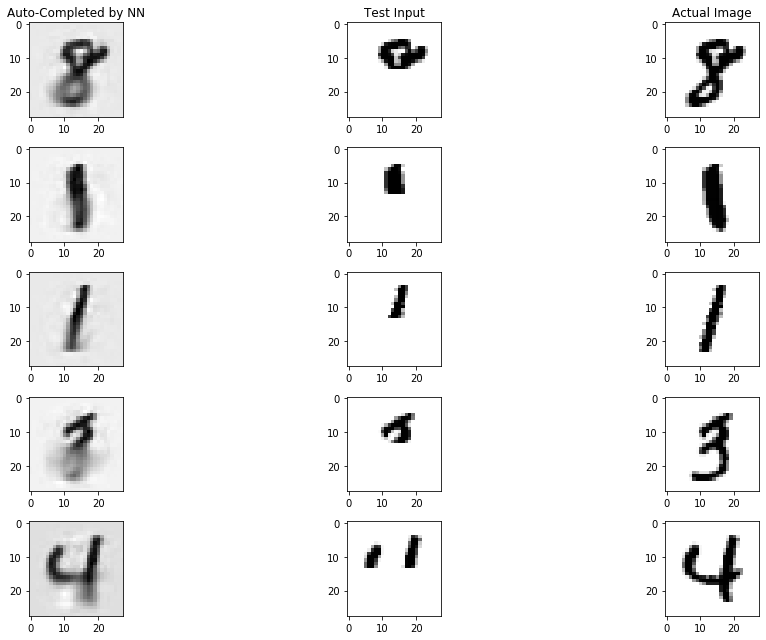

In [69]:
rands = np.random.randint(low=0, high=len(test)-1, size=(5,))
fig, ax = plt.subplots(nrows=5, ncols=3,figsize=(15,9))
row=0
cols = ['Auto-Completed by NN', 'Test Input', 'Actual Image']
for axis, col in zip(ax[0], cols):
    axis.set_title(col) 
for i in rands:
    pred = model.predict(test[i].reshape(1,-1))
    ax[row][0].imshow(np.array(pred).reshape(28,28), cmap="gray_r")
    ax[row][1].imshow(np.array(test[i]).reshape(28,28), cmap="gray_r")
    ax[row][2].imshow(np.array(target_test[i]).reshape(28,28), cmap="gray_r")
    row+=1
fig.tight_layout()
plt.show()

The model can be further imporved by using grid search to find the best hyperparameters.